In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re
train=pd.read_csv('../raw/train.csv')
test=pd.read_csv('../raw/test.csv')
sub=pd.read_csv('../raw/submission.csv')

day_care_center=pd.read_csv('../raw/day_care_center.csv')
park=pd.read_csv('../raw/park.csv')

In [52]:
display(train,test,sub,day_care_center,park)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.8200,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.1700,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.7400,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.3900,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.4300,2004,200801,21~31,3,120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216548,1234823,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,59.8245,2012,201711,11~20,3,22000
1216549,1234824,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,7,30750
1216550,1234825,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,9,29500
1216551,1234826,9586,부산광역시,정관읍 용수리,1364,정관신도시롯데캐슬,정관읍 용수리 1364 정관신도시롯데캐슬,101.7400,2008,201711,21~30,7,26700


,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21
...,...,...,...,...,...,...,...,...,...,...,...,...
5458,1174640,8965,서울특별시,양재동,15-9,위너스,양재동 15-9 위너스,84.0500,2003,201710,11~20,7
5459,1175575,3831,서울특별시,반포동,18-1,래미안퍼스티지,반포동 18-1 래미안퍼스티지,84.9300,2009,201712,1~10,4
5460,1157024,5550,서울특별시,구로동,256-1,삼성래미안,구로동 256-1 삼성래미안,110.1880,2004,201712,21~31,23
5461,1136863,3371,서울특별시,홍제동,24-16,동양드림,홍제동 24-16 동양드림,92.4400,2005,201710,21~31,1


,transaction_id,transaction_real_price
0,1145756,0
1,1198704,0
2,1222384,0
3,1179897,0
4,1223091,0
...,...,...
5458,1174640,0
5459,1175575,0
5460,1157024,0
5461,1136863,0


,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31
...,...,...,...,...,...,...,...,...,...,...,...
7546,부산광역시,금정구,해바라기어린이집,민간,46,13.0,NaN,NaN,NaN,y,2019-01-21
7547,부산광역시,금정구,해수어린이집,가정,19,6.0,NaN,NaN,NaN,y,2019-01-21
7548,부산광역시,금정구,행복한그림동산어린이집,민간,92,16.0,NaN,NaN,NaN,y,2019-01-21
7549,부산광역시,금정구,행복한어린이집,민간,43,12.0,NaN,NaN,NaN,y,2019-01-21


,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,서울특별시,구로구,천왕동,이펜시아어린이공원,어린이공원,1500.0,NaN,조합놀이 1기,NaN,NaN,NaN,2006.0,2019-02-25
1355,서울특별시,구로구,천왕동,개명소공원,소공원,5415.0,NaN,NaN,NaN,NaN,NaN,2006.0,2019-02-25
1356,서울특별시,구로구,천왕동,봉화대근린공원,근린공원,60975.0,NaN,NaN,NaN,NaN,NaN,2006.0,2019-02-25
1357,서울특별시,구로구,항동,푸른수목원,근린공원,100809.0,NaN,NaN,NaN,NaN,NaN,2005.0,2019-02-25


In [104]:
alldata = pd.concat([train,test])

<AxesSubplot:xlabel='floor', ylabel='transaction_real_price'>

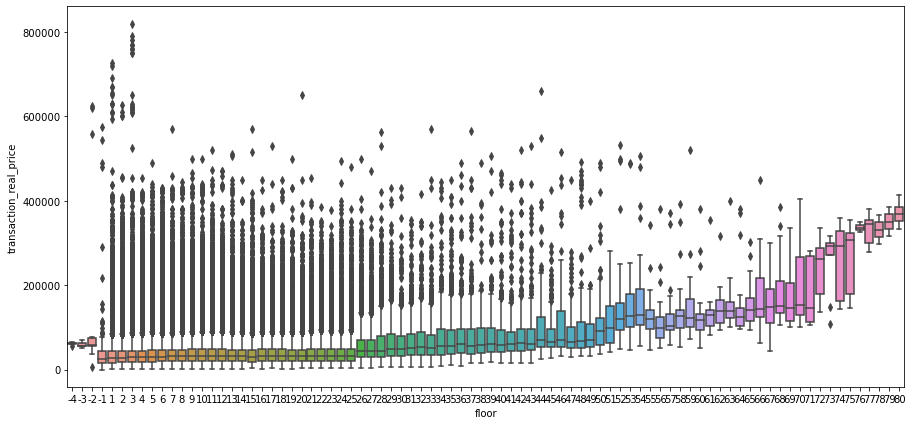

In [54]:
plt.figure(figsize=(15,7))
sns.boxplot(train['floor'], train['transaction_real_price']) # 층별 가격변화

In [56]:
alldata['jibun'] = alldata['jibun'].apply(lambda x : x.split('-')[0]) # 지번 앞 숫자만 추출
alldata['transaction_year'] = pd.to_datetime(alldata['transaction_year_month']).dt.year # 거래된 연도
alldata['transaction_month'] = pd.to_datetime(alldata['transaction_year_month']).dt.month # 거래된 월
alldata['sales_term'] = alldata['year_of_completion'] - alldata['transaction_year'] - (alldata['transaction_month']/12) # 거래에 걸린 시간
alldata['floor_popularity'] = alldata.groupby('floor')['sales_term'].mean() # floor별 거래에 걸린 시간 평균
alldata['floor_division']= np.floor_divide(train['floor'], 9)
alldata['floor_use_area'] = (alldata['floor_division']+1) * alldata['exclusive_use_area'] # 층 구간과 평수의 곱
alldata['apt']= alldata['apt'].apply(lambda x : x.split('(')[0]) # (~동) 제거
alldata['apt'] = alldata['apt'].apply(lambda x : ''.join(x.split())) # 띄어쓰기 제거

<AxesSubplot:xlabel='floor_use_area', ylabel='transaction_real_price'>

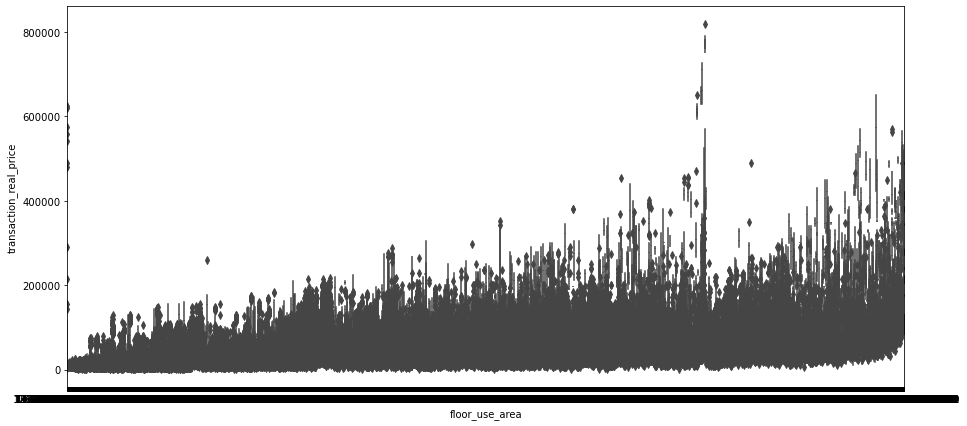

In [59]:
plt.figure(figsize=(15,7))
sns.boxplot(alldata.iloc[:len(train),:]['floor_use_area'], alldata.iloc[:len(train),:]['transaction_real_price']) # 층별 가격변화

In [127]:
alldata['apt'].value_counts()[alldata['apt'].value_counts() ==1]

건영아모리움        1
지오트레벨         1
궁전그린파크빌라      1
푸르지오시티        1
다대대상웰리움       1
             ..
현대빌라102동      1
시청역이즈팰리스2차    1
심포니하우스        1
경동미르웰         1
선경하이빌         1
Name: apt, Length: 158, dtype: int64